In [9]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

import OpenAEM

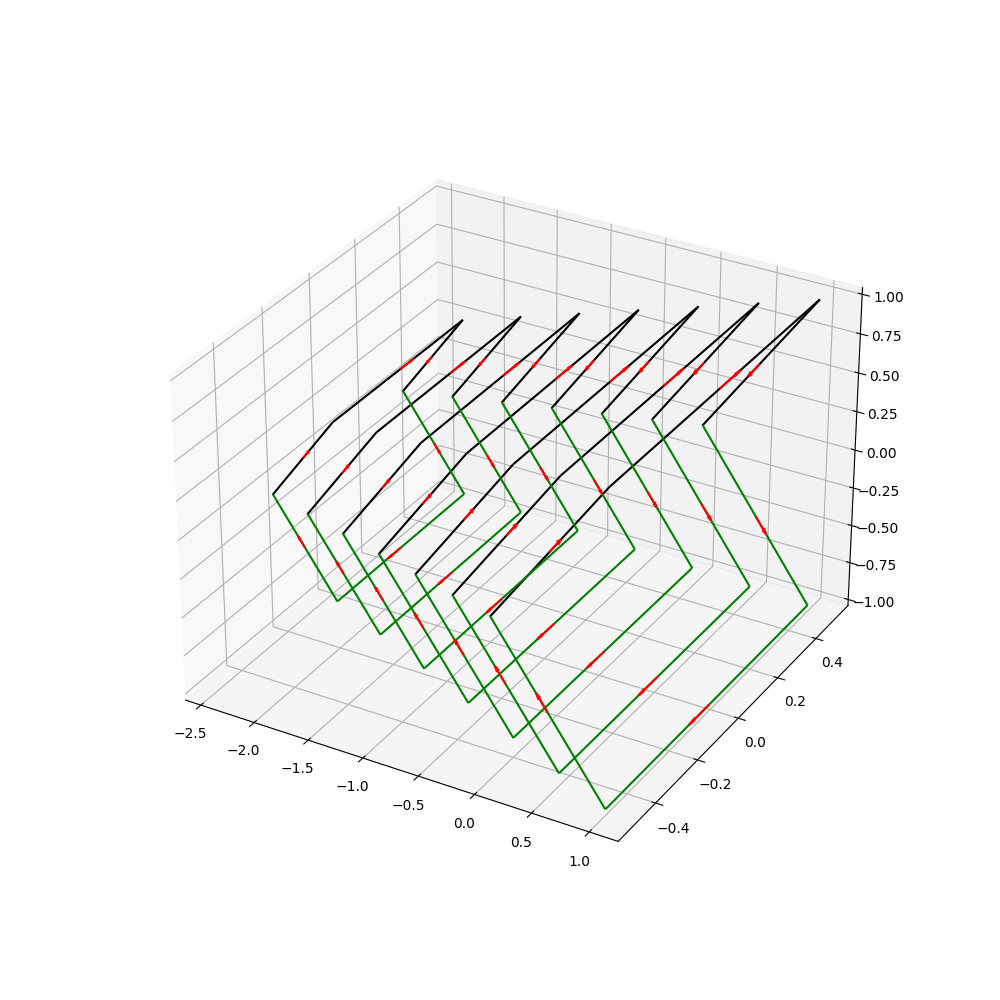

In [10]:
eddy = OpenAEM.pi_packet()
mirror = OpenAEM.mirror_eddy(eddy)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
OpenAEM.plot_eddy(eddy, ax)
OpenAEM.plot_eddy(mirror, ax, color='green')

In [7]:
x = np.linspace(-3, 2, 501)
y = np.linspace(-1, 1, 201)
X, Y = np.meshgrid(x, y, indexing='ij')
U = np.zeros_like(X)
V = np.zeros_like(X)
W = np.zeros_like(X)

for i in range(501):
    for j in range(201):
        xv = np.array([X[i, j], Y[i, j], 0.3])
        # contribution from eddy
        for curve in eddy:
            uv = OpenAEM.biot_savart(xv, curve)
            U[i, j] += uv[0]
            V[i, j] += uv[1]
            W[i, j] += uv[2]
        
        # contribution from image
        for curve in mirror:
            uv = OpenAEM.biot_savart(xv, curve)
            U[i, j] += uv[0]
            V[i, j] += uv[1]
            W[i, j] += uv[2]

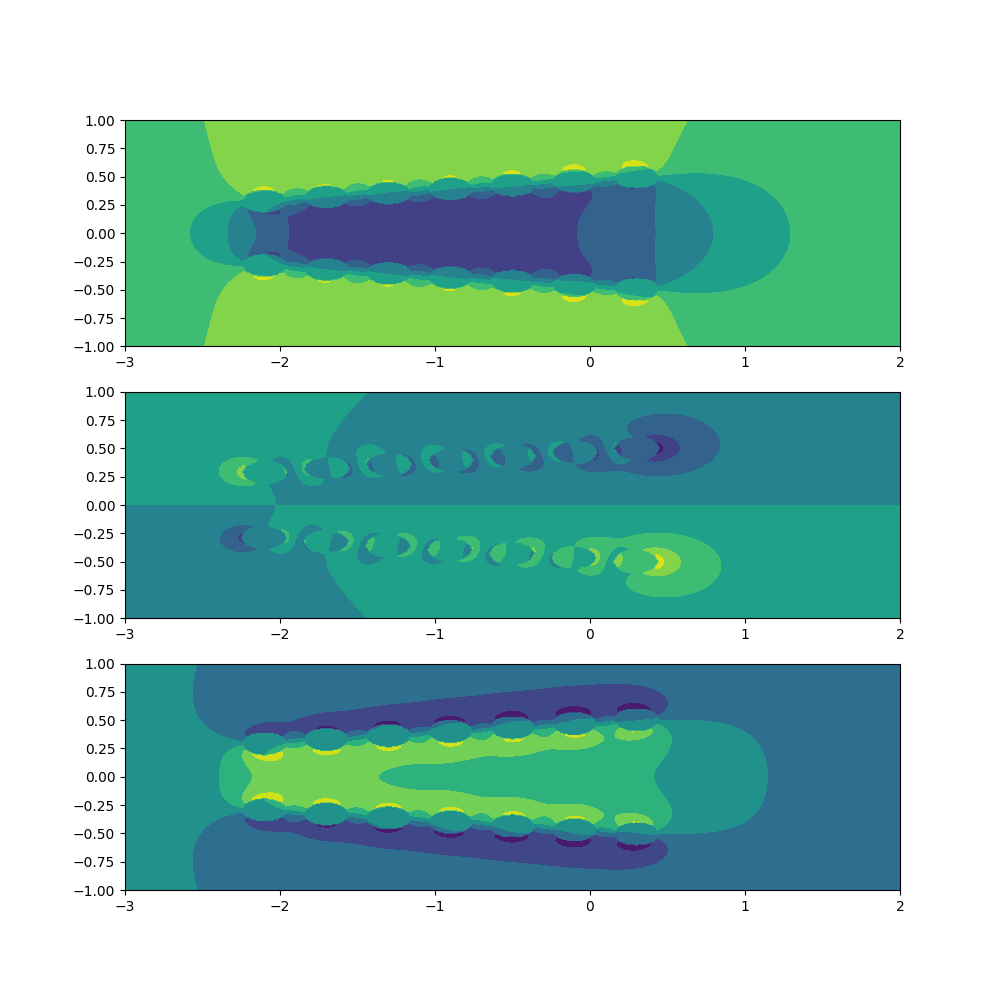

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].contourf(X, Y, U)
ax[1].contourf(X, Y, V)
ax[2].contourf(X, Y, W)

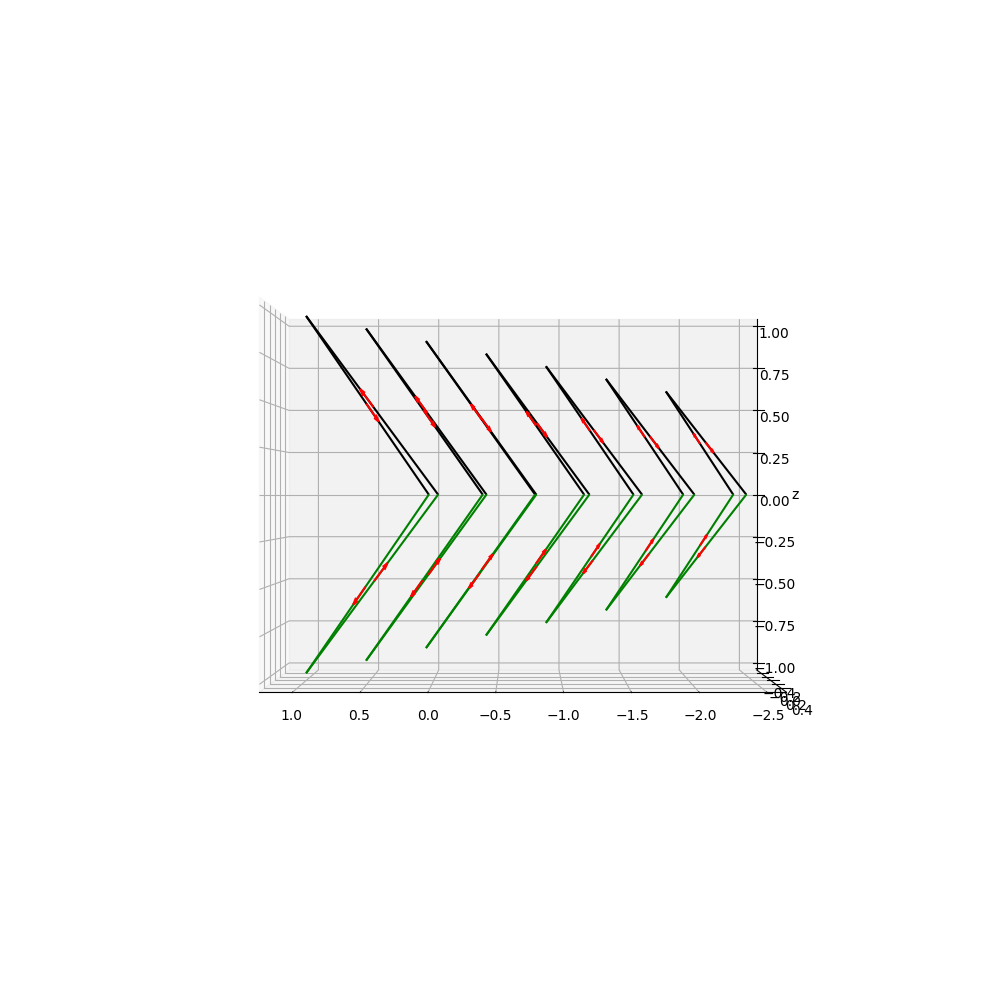

In [2]:
eddy = OpenAEM.lambda_packet()
mirror = OpenAEM.mirror_eddy(eddy)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
OpenAEM.plot_eddy(eddy, ax)
OpenAEM.plot_eddy(mirror, ax, color='green')

ax.set_zlabel('z')
ax.set_zlim(-1, 1)
ax.view_init(0, 90)

In [3]:
x = np.linspace(-3, 2, 501)
y = np.linspace(-1, 1, 1)
X, Y = np.meshgrid(x, y, indexing='ij')
U = np.zeros_like(X)
V = np.zeros_like(X)
W = np.zeros_like(X)

for i in range(101):
    for j in range(41):
        xv = np.array([X[i, j], Y[i, j], 0.3])
        # contribution from eddy
        for curve in eddy:
            uv = OpenAEM.biot_savart(xv, curve)
            U[i, j] += uv[0]
            V[i, j] += uv[1]
            W[i, j] += uv[2]
        
        # contribution from image
        for curve in mirror:
            uv = OpenAEM.biot_savart(xv, curve)
            U[i, j] += uv[0]
            V[i, j] += uv[1]
            W[i, j] += uv[2]

Text(0.5, 1.0, 'wall-normal velocity')

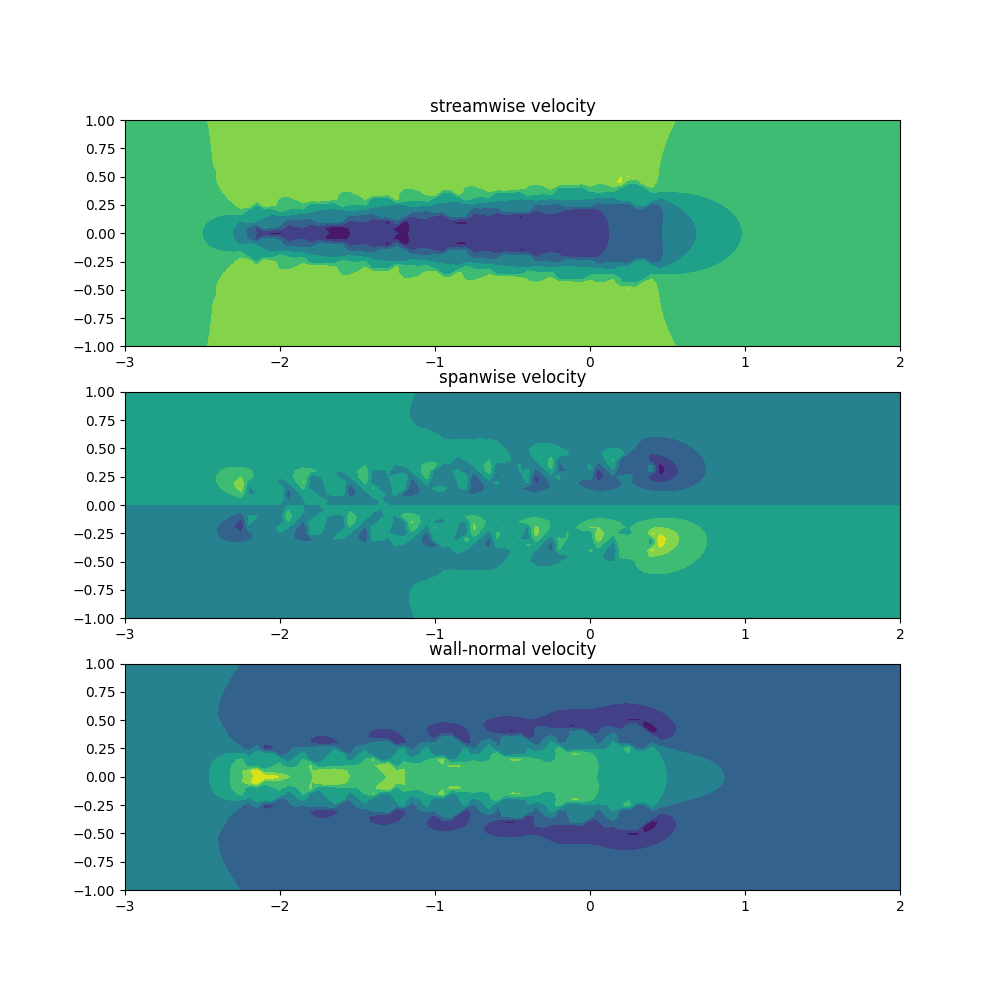

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].contourf(X, Y, U)
ax[0].set_title('streamwise velocity')
ax[1].contourf(X, Y, V)
ax[1].set_title('spanwise velocity')
ax[2].contourf(X, Y, W)
ax[2].set_title('wall-normal velocity')